In [1]:
using Plots
using Printf
include("program.jl")

f_to_P2D(f, range=0:0.1:2pi) = reduce(vcat, map(f, collect(range)));
P2D_normalize(mx) = map(x->x/reduce(max, map(x->reduce(max, (abs.(x))), mx)), mx);

In [2]:
#krzywa parametryczna wygenerowana przez wolframapha dla zapytania "dolphin plot"
x_dolphin(t) = 4/23*sin(62/33 - 58t) + 8/11*sin(10/9 - 56t) + 17/24*sin(38/35 - 55t) + 30/89*sin(81/23 - 54t) + 3/17*sin(53/18 - 53t) + 21/38*sin(29/19 - 52t) + 11/35*sin(103/40 - 51t) + 7/16*sin(79/18 - 50t) + 4/15*sin(270/77 - 49t) + 19/35*sin(59/27 - 48t) + 37/43*sin(71/17 - 47t) + 1*sin(18/43 - 45t) + 21/26*sin(37/26 - 44t) + 27/19*sin(111/32 - 42t) + 8/39*sin(13/25 - 41t) + 23/30*sin(27/8 - 40t) + 23/21*sin(32/35 - 37t) + 18/37*sin(91/31 - 36t) + 45/22*sin(29/37 - 35t) + 56/45*sin(11/8 - 33t) + 4/7*sin(32/19 - 32t) + 54/23*sin(74/29 - 31t) + 28/19*sin(125/33 - 30t) + 19/9*sin(73/27 - 29t) + 16/17*sin(737/736 - 28t) + 52/33*sin(130/29 - 27t) + 41/23*sin(43/30 - 25t) + 29/20*sin(67/26 - 24t) + 64/25*sin(136/29 - 23t) + 162/37*sin(59/34 - 21t) + 871/435*sin(199/51 - 20t) + 61/42*sin(58/17 - 19t) + 159/25*sin(77/31 - 17t) + 241/15*sin(94/31 - 13t) + 259/18*sin(114/91 - 12t) + 356/57*sin(23/25 - 11t) + 2283/137*sin(23/25 - 10t) + 1267/45*sin(139/42 - 9t) + 613/26*sin(41/23 - 8t) + 189/16*sin(122/47 - 6t) + 385/6*sin(151/41 - 5t) + 2551/38*sin(106/35 - 4t) + 1997/18*sin(6/5 - 2t) + 43357/47*sin(81/26 -t) - 4699/35*sin(3t + 25/31) - 1029/34*sin(7t + 20/21) - 250/17*sin(14t + 7/40) - 140/17*sin(15t + 14/25) - 194/29*sin(16t + 29/44) - 277/52*sin(18t + 37/53) - 94/41*sin(22t + 33/31) - 57/28*sin(26t + 44/45) - 128/61*sin(34t + 11/14) - 111/95*sin(38t + 55/37) - 85/71*sin(39t + 4/45) - 25/29*sin(43t + 129/103) - 7/37*sin(46t + 9/20) - 17/32*sin(57t + 11/28) - 5/16*sin(59t + 32/39)
y_dolphin(t) = 5/11*sin(163/37 - 59t) + 7/22*sin(19/41 - 58t) + 30/41*sin(1 - 57t) + 37/29*sin(137/57 - 56t) + 5/7*sin(17/6 - 55t) + 11/39*sin(46/45 - 52t) + 25/28*sin(116/83 - 51t) + 25/34*sin(11/20 - 47t) + 8/27*sin(81/41 - 46t) + 44/39*sin(78/37 - 45t) + 11/25*sin(107/37 - 44t) + 7/20*sin(7/16 - 41t) + 30/31*sin(19/5 - 40t) + 37/27*sin(148/59 - 39t) + 44/39*sin(17/27 - 38t) + 13/11*sin(7/11 - 37t) + 28/33*sin(119/39 - 36t) + 27/13*sin(244/81 - 35t) + 13/23*sin(113/27 - 34t) + 47/38*sin(127/32 - 33t) + 155/59*sin(173/45 - 29t) + 105/37*sin(22/43 - 27t) + 106/27*sin(23/37 - 26t) + 97/41*sin(53/29 - 25t) + 83/45*sin(109/31 - 24t) + 81/31*sin(96/29 - 23t) + 56/37*sin(29/10 - 22t) + 44/13*sin(29/19 - 19t) + 18/5*sin(34/31 - 18t) + 163/51*sin(75/17 - 17t) + 152/31*sin(61/18 - 16t) + 146/19*sin(47/20 - 15t) + 353/35*sin(55/48 - 14t) + 355/28*sin(102/25 - 12t) + 1259/63*sin(71/18 - 11t) + 17/35*sin(125/52 - 10t) + 786/23*sin(23/26 - 6t) + 2470/41*sin(77/30 - 5t) + 2329/47*sin(47/21 - 4t) + 2527/33*sin(23/14 - 3t) + 9931/33*sin(51/35 - 2t) - 11506/19*sin(t + 56/67) - 2081/42*sin(7t + 9/28) - 537/14*sin(8t + 3/25) - 278/29*sin(9t + 23/33) - 107/15*sin(13t + 35/26) - 56/19*sin(20t + 5/9) - 5/9*sin(21t + 1/34) - 17/24*sin(28t + 36/23) - 21/11*sin(30t + 27/37) - 138/83*sin(31t + 1/7) - 10/17*sin(32t + 29/48) - 31/63*sin(42t + 27/28) - 4/27*sin(43t + 29/43) - 13/24*sin(48t + 5/21) - 4/7*sin(49t + 29/23) - 26/77*sin(50t + 29/27) - 19/14*sin(53t + 61/48) + 34/25*sin(54t + 37/26)
f_dolphin(t) = [x_dolphin(t) y_dolphin(t)]
dolphin_P2D = P2D_normalize(f_to_P2D(f_dolphin));

In [3]:
x_bulldog(t)=-4/37*sin(14/13-60*t)-1/26*sin(8/7-58*t)-3/25*sin(48/47-56*t)-5/18*sin(66/67-55*t)-4/23*sin(29/22-49*t)-1/8*sin(1/13-47*t)-11/27*sin(1/8-43*t)-2/5*sin(3/26-42*t)-9/23*sin(29/22-38*t)-12/73*sin(31/29-35*t)-27/32*sin(44/43-33*t)-43/64*sin(5/28-31*t)-23/30*sin(74/49-29*t)-1/6*sin(1/9-26*t)-59/39*sin(41/29-21*t)-11/30*sin(17/39-20*t)-211/17*sin(1/35-9*t)-241/19*sin(23/17-7*t)+36430/149*sin(t+5/18)+2217/46*sin(2*t+73/20)+327/38*sin(3*t+11/8)+833/125*sin(4*t+111/40)+376/37*sin(5*t+121/27)+193/31*sin(6*t+77/40)+115/22*sin(8*t+19/14)+600/49*sin(10*t+57/86)+212/39*sin(11*t+11/16)+141/37*sin(12*t+26/7)+32/13*sin(13*t+38/45)+101/31*sin(14*t+21/25)+175/34*sin(15*t+22/25)+62/21*sin(16*t+131/32)+31/30*sin(17*t+139/49)+33/46*sin(18*t+37/46)+61/18*sin(19*t+22/17)+25/29*sin(22*t+5/22)+27/16*sin(23*t+89/36)+41/32*sin(24*t+62/45)+23/30*sin(25*t+143/53)+10/19*sin(27*t+85/26)+13/17*sin(28*t+75/26)+4/13*sin(30*t+51/50)+31/72*sin(32*t+226/55)+14/29*sin(34*t+75/16)+8/27*sin(36*t+34/9)+14/41*sin(37*t+23/20)+11/30*sin(39*t+53/34)+11/54*sin(40*t+87/26)+4/29*sin(41*t+17/32)+14/31*sin(44*t+2/11)+1/4*sin(45*t+49/11)+13/48*sin(46*t+18/25)+1/19*sin(48*t+12/11)+6/35*sin(50*t+220/63)+8/21*sin(51*t+12/13)+13/53*sin(52*t+83/45)+3/14*sin(53*t+11/26)+10/33*sin(54*t+86/21)+3/40*sin(57*t+133/100)+9/64*sin(59*t+49/23)+3/11*sin(61*t+133/52)+1/33*sin(62*t+141/31)-59191/111
y_bulldog(t)=-2/27*sin(12/25-55*t)-16/63*sin(26/47-54*t)-19/94*sin(1/2-53*t)-5/22*sin(77/96-52*t)-1/21*sin(15/32-48*t)-8/25*sin(31/41-47*t)-1/4*sin(32/41-46*t)-1/27*sin(61/44-35*t)-29/64*sin(377/251-33*t)-24/35*sin(33/25-26*t)-9/7*sin(35/44-19*t)-182/29*sin(44/43-9*t)-355/32*sin(15/16-6*t)-1513/36*sin(16/11-5*t)-3265/48*sin(27/25-4*t)-4349/20*sin(82/55-1*t)+3312/29*sin(2*t+55/34)+18*sin(3*t+85/19)+93/14*sin(7*t+159/50)+131/23*sin(8*t+75/28)+105/44*sin(10*t+41/9)+151/26*sin(11*t+4/27)+51/23*sin(12*t+29/15)+65/17*sin(13*t+63/95)+28/25*sin(14*t+93/25)+17/22*sin(15*t+283/71)+100/37*sin(16*t+84/23)+46/21*sin(17*t+21/5)+28/43*sin(18*t+103/30)+20/19*sin(20*t+28/23)+26/37*sin(21*t+35/36)+8/7*sin(22*t+26/15)+11/35*sin(23*t+59/23)+35/52*sin(24*t+161/37)+1/6*sin(25*t+9/28)+11/49*sin(27*t+16/7)+32/35*sin(28*t+206/55)+37/32*sin(29*t+36/11)+29/40*sin(30*t+66/23)+20/61*sin(31*t+85/32)+32/51*sin(32*t+29/37)+27/55*sin(34*t+34/25)+13/28*sin(36*t+49/23)+11/25*sin(37*t+61/14)+17/21*sin(38*t+31/8)+11/29*sin(39*t+121/29)+50/151*sin(40*t+93/40)+2/19*sin(41*t+19/47)+15/46*sin(42*t+88/27)+8/19*sin(43*t+103/22)+2/13*sin(44*t+156/41)+1/17*sin(45*t+109/24)+11/24*sin(49*t+24/13)+40/121*sin(50*t+25/9)+1/9*sin(51*t+80/51)+7/32*sin(56*t+31/36)+2/21*sin(57*t+85/38)+7/33*sin(58*t+58/31)+3/37*sin(59*t+202/47)+7/30*sin(60*t+71/25)+2/15*sin(61*t+49/32)+22/59*sin(62*t+91/36)-37783/23
f_bulldog(t) = [x_bulldog(t) y_bulldog(t)]
bulldog_P2D = 4 * P2D_normalize(f_to_P2D(f_bulldog));
bulldog_P2D[:, 1] .+= 1; bulldog_P2D[:, 2] .+= 3;

In [4]:
x_cat(t)=-(721*sin(t))/4+196/3*sin(2t)-86/3*sin(3t)-131/2*sin(4t)+477/14*sin(5t)+27*sin(6t)-29/2*sin(7t)+68/5*sin(8t)+1/10*sin(9t)+23/4*sin(10t)-19/2*sin(12t)-85/21*sin(13t)+2/3*sin(14t)+27/5*sin(15t)+7/4*sin(16t)+17/9*sin(17t)-4*sin(18t)-1/2*sin(19t)+1/6*sin(20t)+6/7*sin(21t)-1/8*sin(22t)+1/3*sin(23t)+3/2*sin(24t)+13/5*sin(25t)+1*sin(26t)-2*sin(27t)+3/5*sin(28t)-1/5*sin(29t)+1/5*sin(30t)+(2337*cos(t))/8-43/5*cos(2t)+322/5*cos(3t)-117/5*cos(4t)-26/5*cos(5t)-23/3*cos(6t)+143/4*cos(7t)-11/4*cos(8t)-31/3*cos(9t)-13/4*cos(10t)-9/2*cos(11t)+41/20*cos(12t)+8*cos(13t)+2/3*cos(14t)+6*cos(15t)+17/4*cos(16t)-3/2*cos(17t)-29/10*cos(18t)+11/6*cos(19t)+12/5*cos(20t)+3/2*cos(21t)+11/12*cos(22t)-4/5*cos(23t)+1*cos(24t)+17/8*cos(25t)-7/2*cos(26t)-5/6*cos(27t)-11/10*cos(28t)+1/2*cos(29t)-1/5*cos(30t)
y_cat(t)=-(637*sin(t))/2-188/5*sin(2t)-11/7*sin(3t)-12/5*sin(4t)+11/3*sin(5t)-37/4*sin(6t)+8/3*sin(7t)+65/6*sin(8t)-32/5*sin(9t)-41/4*sin(10t)-38/3*sin(11t)-47/8*sin(12t)+5/4*sin(13t)-41/7*sin(14t)-7/3*sin(15t)-13/7*sin(16t)+17/4*sin(17t)-9/4*sin(18t)+8/9*sin(19t)+3/5*sin(20t)-2/5*sin(21t)+4/3*sin(22t)+1/3*sin(23t)+3/5*sin(24t)-3/5*sin(25t)+6/5*sin(26t)-1/5*sin(27t)+10/9*sin(28t)+1/3*sin(29t)-3/4*sin(30t)-(125*cos(t))/2-521/9*cos(2t)-359/3*cos(3t)+47/3*cos(4t)-33/2*cos(5t)-5/4*cos(6t)+31/8*cos(7t)+9/10*cos(8t)-119/4*cos(9t)-17/2*cos(10t)+22/3*cos(11t)+15/4*cos(12t)-5/2*cos(13t)+19/6*cos(14t)+7/4*cos(15t)+31/4*cos(16t)-1*cos(17t)+11/10*cos(18t)-2/3*cos(19t)+13/3*cos(20t)-5/4*cos(21t)+2/3*cos(22t)+1/4*cos(23t)+5/6*cos(24t)+3/4*cos(26t)-1/2*cos(27t)-1/10*cos(28t)-1/3*cos(29t)-1/19*cos(30t)
f_cat(t) = [x_cat(t) y_cat(t)]
cat_P2D = P2D_normalize(f_to_P2D(f_cat));

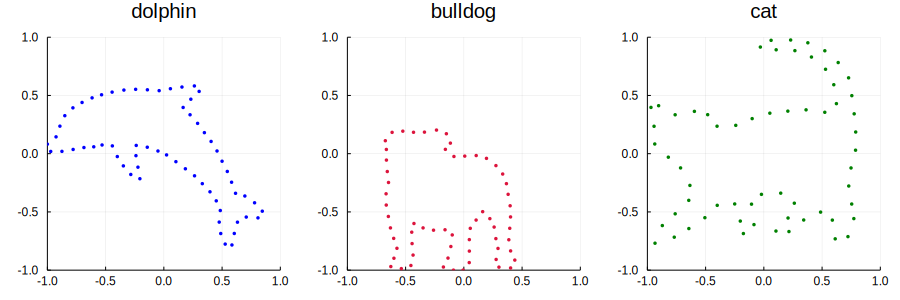

In [36]:
plot_dolph = scatter(title="dolphin", markersize=2, markercolor=:blue, markerstrokealpha=0, dolphin_P2D[:, 1], dolphin_P2D[:, 2])
plot_dog = scatter(title="bulldog", markersize=2, markercolor=:crimson, markerstrokealpha=0,bulldog_P2D[:, 1], bulldog_P2D[:, 2])
plot_cat = scatter(title="cat", markersize=2, markercolor=:green, markerstrokealpha=0,cat_P2D[:, 1], cat_P2D[:, 2])
scatter(size=(900, 300), layout=(1, 3), aspect_ratio=:equal, legend=:none, xlim=(-1, 1), ylim=(-1, 1), plot_dolph, plot_dog, plot_cat)

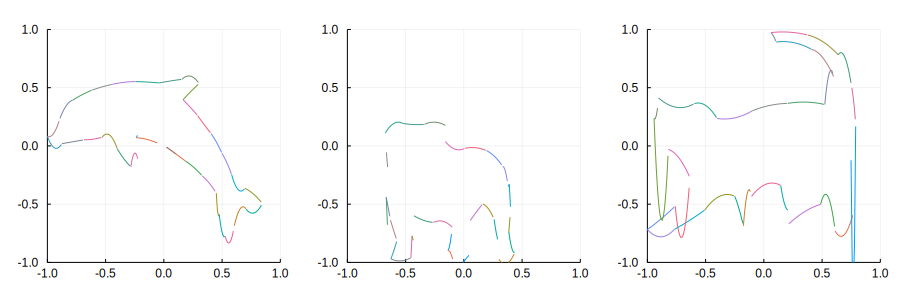

In [72]:
include("program.jl")
step = 2

plot_interp = function(P2D)
    _plot = plot(collect(P2D[1, 1]:0.01:P2D[step, 1]), interp_newton(P2D[1:step, :]))
    n = length(P2D[:, 1]);
    for i in 1:step:n
        i2 = min(n, i+step)
        x0, x1 = P2D[i, 1], P2D[i2, 1]
        x0, x1 = min(x0, x1), max(x0, x1)
        _plot = plot!(collect(x0:0.01:x1), interp_newton(P2D[i:i2, :]))
    end
    return _plot
end

dolphin_plot_newton = plot_interp(dolphin_P2D)
bulldog_plot_newton = plot_interp(bulldog_P2D)
cat_plot_newton = plot_interp(cat_P2D)

plot(size=(900, 300), layout=(1, 3), aspect_ratio=:equal, legend=:none, xlim=(-1, 1), ylim=(-1,1), dolphin_plot_newton, bulldog_plot_newton, cat_plot_newton)

Jak widać, metoda interpolacji Newtona dla bardziej skomplikowanych kształtów jest bardzo nieefektywna. Nie da się interpolować pionowych linii, a sposób podziału krzywej na ciągi wartości nie jest prostym problemem. 

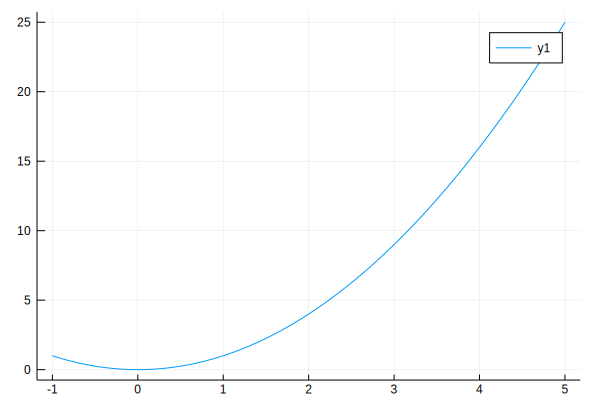

In [51]:
plot(collect(-1:0.01:5), x->x^2)